In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
atlanta_crime_data = "./COBRA-2009-2018.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
atlanta_crime_df = pd.read_csv(atlanta_crime_data)

atlanta_crime_df.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,408.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,506.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,413.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,204.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,408.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


In [1]:
#crime_location_df = atlanta_crime_df.groupby(['Location','UCR Literal']).count()
#metastatic_sem_pivot = metastatic_sems.pivot(index = 'Timepoint', columns = 'Drug')
#crime_location_table = crime_location_df.pivot_table(index = ['Location'], columns = 'UCR Literal')
#crime_location_table.head()

In [7]:
#atlanta_crime_df.loc[atlanta_crime_df['Report Date']=='2009-01-01']
#df[df['model'].str.contains('ac')]
#atlanta_crime_df.loc[atlanta_crime_df['Report Date'].str.contains('2009')]

In [17]:
atlanta_crime_2018_df = atlanta_crime_df.loc[atlanta_crime_df['Report Date'].str.contains('2018')]
#df_grp = df.groupby(['rank', 'discipline'])
robbery_pedestrian_2018 = atlanta_crime_2018_df.loc[atlanta_crime_2018_df['UCR Literal']=='ROBBERY-PEDESTRIAN']
#atlanta_crime_2018_grp = atlanta_crime_2018_df.groupby(['Neighborhood','UCR Literal'])
robbery_pedestrian_2018 = robbery_pedestrian_2018.groupby('Neighborhood')
pedestrian_crime = robbery_pedestrian_2018['UCR Literal'].count()

robbery_pedestrian_2018 = pd.DataFrame({'Pedestrian Crime 2018': pedestrian_crime})
robbery_pedestrian_2018.head()

,Pedestrian Crime 2018
Neighborhood,
Adair Park,12
Adams Park,2
Adamsville,15
Almond Park,6
Ansley Park,2


In [21]:
robbery_pedestrian_2018_graph = robbery_pedestrian_2018.sort_values("Pedestrian Crime 2018", axis=0, ascending=False).head(10)

In [22]:
robbery_pedestrian_2018_graph


,Pedestrian Crime 2018
Neighborhood,
Downtown,69
Midtown,32
West End,29
Grove Park,25
Mechanicsville,22
Lindridge/Martin Manor,16
East Atlanta,16
Adamsville,15
Greenbriar,14


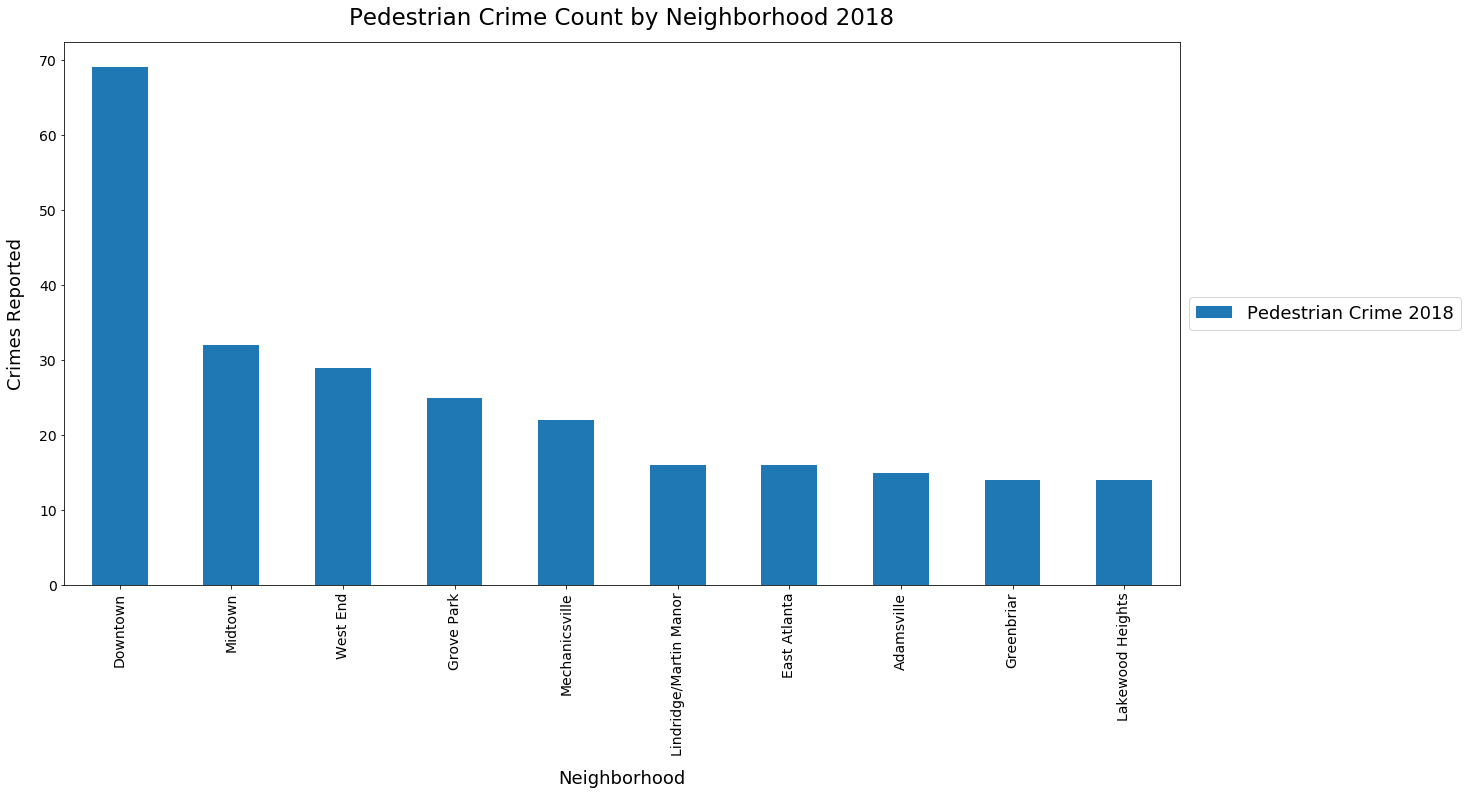

In [37]:
#robbery_pedestrian_2018_graph.plot(kind='bar',x='Neighborhood',y='Pedestrian Crime Count 2018')
robbery_pedestrian_2018_graph.plot.bar(figsize=(20, 10))
plt.xlabel("Neighborhood", labelpad=14, fontsize=18)
plt.ylabel("Crimes Reported", labelpad=14, fontsize=18)
plt.title("Pedestrian Crime Count by Neighborhood 2018", y=1.02, fontsize=23)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=18)
plt.tick_params(labelsize=14)
# the plot gets saved to 'output.png'
#plt.savefig('output.png')